In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
start_date = '2024-01-01'

In [18]:
from pathlib import Path
f = print(__location__, Path(__file__).resolve().parent)
print(f)

NameError: name '__location__' is not defined

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('/content/drive/MyDrive/ukc/Bill2233_Logbook (2).xlsx')
df[['style','style category']] = df['Style'].str.split(' ',expand=True)
df=df.drop(columns=['Style'])
df.rename(columns={'Partner(s)': 'Partner'}, inplace=True)
#add index
df['log_id'] = df.index + 1
#convert date
df['Date']=pd.to_datetime(df['Date'], format='%d/%b/%y')
#only show rows from this year
df=df[(df['Date'] > start_date)]
df["first star"]= df["Grade"].str.find('*')
df[['overall grade','technical grade', 'star rating']] = df['Grade'].str.split(' ',expand=True)


In [11]:
def get_ukc_data():
    """Grab ukc data from a xlsx file.

    This uses caching to avoid having to read the file every time. If we were
    reading from an HTTP endpoint instead of a file, it's a good idea to set
    a maximum age to the cache with the TTL argument: @st.cache_data(ttl='1d')
    """

    # Instead of a CSV on disk, you could read from an HTTP endpoint here too.
    df = pd.read_excel('/content/drive/MyDrive/ukc/Bill2233_Logbook (2).xlsx')
    df[['style','style category']] = df['Style'].str.split(' ',expand=True)
    df=df.drop(columns=['Style'])
    df.rename(columns={'Partner(s)': 'Partner'}, inplace=True)
    #add index
    df['log_id'] = df.index + 1
    #convert date
    df['Date']=pd.to_datetime(df['Date'], format='%d/%b/%y')
    #only show rows from this year
    df=df[(df['Date'] > start_date)]
    df["first star"]= df["Grade"].str.find('*')
    df[['overall grade','technical grade', 'star rating']] = df['Grade'].str.split(' ',expand=True)

    return df

ukc_df = get_ukc_data()

print(ukc_df)

         Climb name      Grade         Partner  \
0         'A' Route   S 4a ***        BigSoph    
1            Rebate      VD  *  ben2, BigSoph    
2        The Pusher   VS 5a **  ben2, BigSoph    
3           Nirvana  VS 4c ***  ben2, BigSoph    
4            Rebate      VD  *  ben2, BigSoph    
..              ...        ...             ...   
317  Cup and Saucer      VD  *             Tim   
318     The Pothole      VD  *             Tim   
319    Long Chimney    HVD  **             Tim   
320       Root D'Or       5a          BigSoph    
321    Cup of Cheer       5b               NaN   

                                                 Notes       Date  \
0                                                  NaN 2024-10-13   
1                                Still a pile of choss 2024-09-29   
2    Better than nirvana? Micro offsets protect the... 2024-09-29   
3                                                  NaN 2024-09-29   
4                                Still a pile of choss

In [7]:
ukc_df=pd.read_excel('/content/drive/MyDrive/ukc/Bill2233_Logbook (2).xlsx')
ukc_df[['style','style category']] = ukc_df['Style'].str.split(' ',expand=True)
ukc_df=ukc_df.drop(columns=['Style'])
ukc_df.rename(columns={'Partner(s)': 'Partner'}, inplace=True)
#add index
ukc_df['log_id'] = ukc_df.index + 1
#convert date
ukc_df['Date']=pd.to_datetime(ukc_df['Date'], format='%d/%b/%y')
#only show rows from this year
ukc_df=ukc_df[(ukc_df['Date'] > start_date)]
ukc_df["first star"]= ukc_df["Grade"].str.find('*')
ukc_df[['overall grade','technical grade', 'star rating']] = ukc_df['Grade'].str.split(' ',expand=True)
print(ukc_df)

         Climb name      Grade         Partner  \
0         'A' Route   S 4a ***        BigSoph    
1            Rebate      VD  *  ben2, BigSoph    
2        The Pusher   VS 5a **  ben2, BigSoph    
3           Nirvana  VS 4c ***  ben2, BigSoph    
4            Rebate      VD  *  ben2, BigSoph    
..              ...        ...             ...   
317  Cup and Saucer      VD  *             Tim   
318     The Pothole      VD  *             Tim   
319    Long Chimney    HVD  **             Tim   
320       Root D'Or       5a          BigSoph    
321    Cup of Cheer       5b               NaN   

                                                 Notes       Date  \
0                                                  NaN 2024-10-13   
1                                Still a pile of choss 2024-09-29   
2    Better than nirvana? Micro offsets protect the... 2024-09-29   
3                                                  NaN 2024-09-29   
4                                Still a pile of choss

In [ ]:


# Split the 'Partner' column by the delimiter ','
df_split = df.assign(Partner=df['Partner'].str.split(','))

# Explode the 'Partner' column to create a new row for each partner
df_split = df_split.explode('Partner')

# Strip any leading/trailing whitespace from the 'Partner' column
df_split['Partner'] = df_split['Partner'].str.strip()

# Reorder the columns for clarity
df_split = df_split[['log_id', 'Grade Type', 'Partner']]


   Grade Type  counts
3        Trad     197
2       Sport     132
0  Bouldering      44
1  Scrambling       5
4      Winter       1


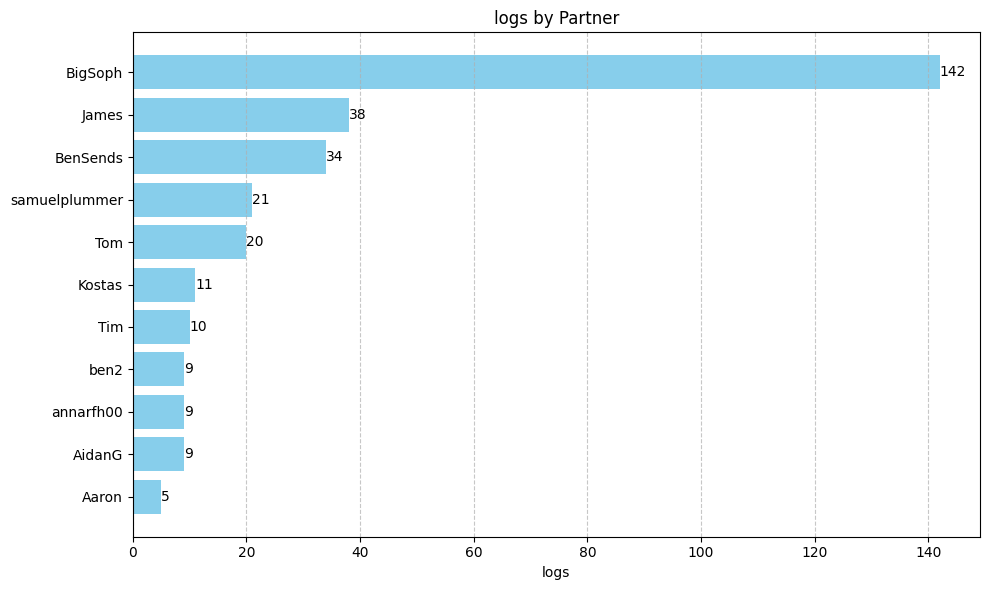

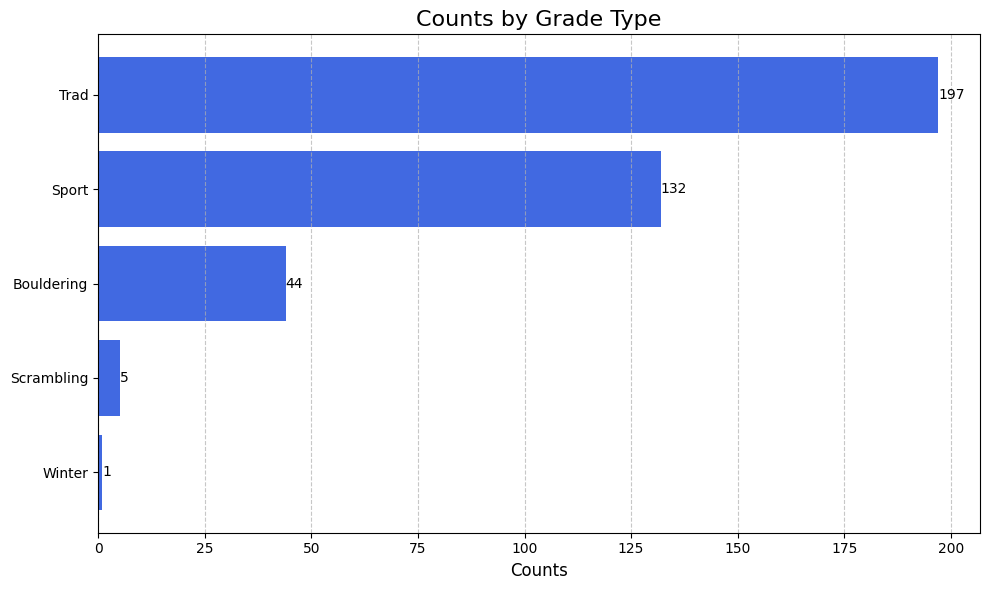

In [ ]:

import matplotlib.pyplot as plt
##creating counts of logs by partner

partner=df_split.groupby(['Partner']).size().reset_index(name='counts')
partner=partner.sort_values('counts', ascending=False)

#counts of logs by route type
route_type=df_split.groupby(['Grade Type']).size().reset_index(name='counts')



##creating counts of logs by partner by grade type

partner_type=df_split.groupby(['Grade Type','Partner']).size().reset_index(name='counts')

#sort
route_type=route_type.sort_values('counts', ascending=False)
partner_type=partner_type.sort_values('counts', ascending=False)
partner=partner.sort_values('counts', ascending=False)





# Sort the DataFrame by counts for better visualization
partner = partner.sort_values('counts', ascending=True)
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(partner['Partner'], partner['counts'], color='skyblue')
plt.xlabel('logs')
plt.title('logs by Partner')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the values on the bars
for index, value in enumerate(partner['counts']):
    plt.text(value, index, str(value), va='center')
print(route_type)
# Display the plot
plt.tight_layout()
plt.show()

route_type = route_type.sort_values('counts', ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(route_type['Grade Type'], route_type['counts'], color='royalblue')

# Adding gridlines and customizing
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Counts', fontsize=12)
plt.title('Counts by Grade Type', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add data labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Find the partner with the most counts
max_counts_row = partner.loc[partner['counts'].idxmax()]
most_counts_partner = max_counts_row['Partner']
most_counts_value = max_counts_row['counts']

# Generate summary text
summary_text = f"You climbed the most with {most_counts_partner} - {most_counts_value} logs!"

# Generate humorous text based on the number of partners
num_partners = len(partner)

if num_partners < 5:
    funny_text = f"You only climbed with {num_partners} people this year. Looks like a small gathering! Do you need some more friends?!"
elif num_partners < 10:
    funny_text = f"You climbed with {num_partners} people this year. Enough for a fun game night i suppose!"
else:
    funny_text = f"You climbed with {num_partners} people this year. Wow, we've got a whole crowd! It's like a party in here!"

# Combine the summary and humorous text
partner_text = summary_text + " " + funny_text

print(partner_text)

You climbed the most with BigSoph - 142 logs! You climbed with 11 people this year. Wow, we've got a whole crowd! It's like a party in here!


In [ ]:
##creating counts of logs by style

stylecategory=df.groupby(['style category']).size().reset_index(name='counts')
stylecategory=stylecategory.sort_values('counts', ascending=False)
print(stylecategory)

  style category  counts
1            O/S     120
5            rpt      35
4            dog      19
7              β      15
2             RP       8
3            dnf       6
0            G/U       5
6              x       4


In [ ]:
import random


# Find the style with the most counts
most_common_style_row = stylecategory.loc[stylecategory['counts'].idxmax()]
most_common_style = most_common_style_row['style category']
most_common_counts = most_common_style_row['counts']

# Extract counts for dnf and dog
dnf_counts = stylecategory.loc[stylecategory['style category'] == 'dnf', 'counts'].values[0]
dog_counts = stylecategory.loc[stylecategory['style category'] == 'dog', 'counts'].values[0]

summary_text = f"Your most common style was {most_common_style} with {most_common_counts} logs."

# Options for humorous text based on the most common style
funny_text_options = {
    'O/S': [
        "Wow, you must hate falling off stuff!",
        "Onsight? More like 'on-sight of the ground'!",
        "Looks like you’re a pro at making gravity your friend!"
    ],
    'rpt': [
        "Wow, do you hate onsighting ethics?",
        "Redpoint? Sounds like you have a few stories to tell!",
        "Looks like you’ve got the hang of it—literally!"
    ],
    'dog': [
        "Guess you prefer the doggy paddle method of climbing!",
        "Dogging? That's just rock climbing with a built-in rest day!",
        "Looks like you’re a fan of the ‘take a break’ style!"
    ],
    'β': [
        "Ah, the β is a classic! Climbing’s version of a fancy cocktail!",
        "Looks like you're into the beta game—smooth moves!",
        "Who needs to climb when you can plan your way up?"
    ],
    'RP': [
        "Looks like you're a fan of the redpoint hustle!",
        "Redpointing is just a fancy way of saying, 'I need to try again!'",
        "Guess you’re all about those perfect sends!"
    ],
    'dnf': [
        "So close, yet so far! DNF should stand for 'Did Not Finish'... or 'Delightful New Fall'!",
        "DNF? More like 'Didn’t Quite Make It'! Better luck next time!",
        "Looks like the wall just wasn’t ready for you!"
    ],
    'G/U': [
        "G/U? Sounds like a plan! Let’s gear up for the next climb!",
        "G/U? That's code for 'Get Up!' Let's do this!",
        "Looks like you're all about that gear and adventure!"
    ],
    'x': [
        "An 'x' marks the spot, but did you find the treasure?",
        "X marks the spot? Hopefully, it's not your fall zone!",
        "Guess you’re aiming for the unknown—exciting!"
    ],
}

# Randomly select humorous text for the most common style
funny_text = random.choice(funny_text_options[most_common_style])

# Generate additional humorous text for dnf and dog counts
dnf_funny_text_options = [
    "You've got {0} DNFs! Maybe the rock wasn't ready for you!",
    "Looks like the wall just wasn’t ready for you! You have {0} DNFs.",
    "You tried {0} times but just couldn't get it together, huh?"
]

dog_funny_text_options = [
    "And you dogged {0} routes! Sometimes the best way up is to take it slow!",
    "You’ve got {0} dogged routes under your belt! Slow and steady wins the race!",
    "You dogged {0} routes? That's a lot of resting on the way up!"
]

# Check counts and select humorous texts based on them
if dnf_counts > 0:
    dnf_funny_text = random.choice(dnf_funny_text_options).format(dnf_counts)
else:
    dnf_funny_text = "No DNFs in sight! Looks like you climbed strong!"

if dog_counts > 0:
    dog_funny_text = random.choice(dog_funny_text_options).format(dog_counts)
else:
    dog_funny_text = "No dogged routes? You must be a climbing ninja!"

# Combine all texts into the final output
style_text = (
    summary_text + " " + funny_text + " " +
    dnf_funny_text + " " + dog_funny_text
)

print(style_text)


Your most common style was O/S with 120 logs. Looks like you’re a pro at making gravity your friend! You've got 6 DNFs! Maybe the rock wasn't ready for you! And you dogged 19 routes! Sometimes the best way up is to take it slow!


In [ ]:

style=df.groupby(['style']).size().reset_index(name='counts')
style=style.sort_values('counts', ascending=False)
print(style)

   style  counts
3   Lead     195
1    2nd      57
4   Sent      40
2  AltLd      11
6     TR       8
5   Solo       7
0      -       4


In [ ]:
# Find the style with the most counts
most_common_style_row = style.loc[style['counts'].idxmax()]
most_common_style = most_common_style_row['style']
most_common_counts = most_common_style_row['counts']

# Extract counts for specific styles
tr_counts = style.loc[style['style'] == 'TR', 'counts'].values[0]
solo_counts = style.loc[style['style'] == 'Solo', 'counts'].values[0]

# Generate summary text
summary_text = (
    f"You normally climbed {most_common_style} with {most_common_counts} logs. "
    f"You've done {solo_counts} Solo climbs and {tr_counts} TR climbs."
)
# Generate summary text
summary_text = f"You normally climbed {most_common_style} with {most_common_counts} logs."

# Options for humorous text based on the most common style
funny_text_options = {
    'Lead': [
        "Leading the way, I see! Who needs a safety net?",
        "Wow, you really like to live on the edge—literally!",
        "Looks like you're the captain of the climbing ship!"
    ],
    '2nd': [
        "So you enjoy following the leader? Nice to have a trusty guide!",
        "Being a second means you get the best view of the show!",
        "Ah, the trusty 2nd—always there for support!"
    ],
    'Sent': [
        "Sent it? I bet it felt great to conquer that route!",
        "Congratulations on sending! That’s what I call a high-five!",
        "Looks like you’re all about those epic sends!"
    ],
    'AltLd': [
        "AltLd? Ah, the art of leading and following at the same time!",
        "You're a true multi-tasker in the climbing world!",
        "Sounds like you’re all about the best of both worlds!"
    ],
    'TR': [
        "Top roping, huh? That's like driving with training wheels!",
        "TR? It's all fun and games until someone falls!",
        "Looks like you're keeping it safe up there!"
    ],
    'Solo': [
        "Solo climbing? Living dangerously, I see!",
        "No ropes? You must really trust your skills!",
        "You must have nerves of steel to climb solo!"
    ],
    '-': [
        "What does '-' mean? Is it a secret climbing style?",
        "Looks like you’re keeping it mysterious with that dash!",
        "Ah, the unknown! The wild card of climbing styles!"
    ],
}

# Randomly select humorous text for the most common style
funny_text = random.choice(funny_text_options[most_common_style])

# Randomly select humorous texts for TR and Solo
tr_humor = random.choice(funny_text_options['TR'])
solo_humor = random.choice(funny_text_options['Solo'])

# Combine the required texts into the final output
climb_style_text = (
    summary_text + " " + funny_text + " " +
    solo_humor + " " +
    tr_humor
)

print(climb_style_text)

You normally climbed Lead with 195 logs. Wow, you really like to live on the edge—literally! You must have nerves of steel to climb solo! Looks like you're keeping it safe up there!


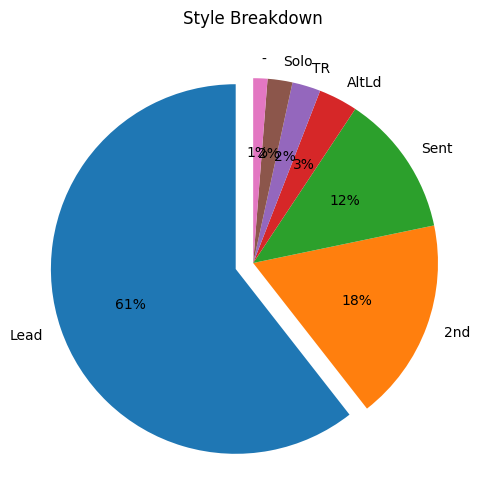

In [ ]:
graph=style
# Adding explode, colors, and custom start angle
explode = [0.1] + [0] * (len(graph) - 1)

graph.set_index('style').plot.pie(
    y='counts',
    autopct='%1.f%%',
        explode=explode,
    startangle=90,             # Start the pie chart at 90 degrees
    figsize=(6, 6),
    legend=False
)

plt.title('Style Breakdown')
plt.ylabel('')

plt.show()

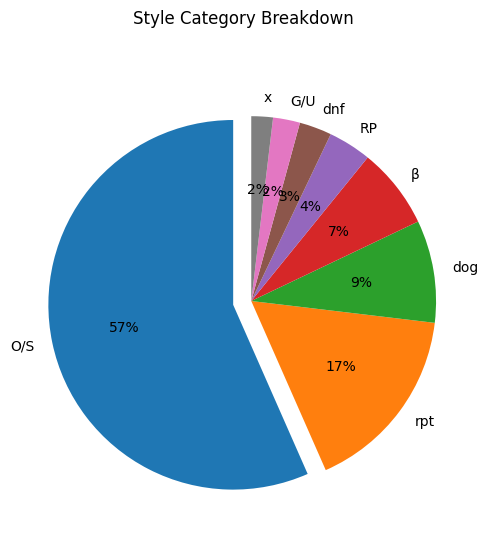

In [ ]:
graph=stylecategory
# Adding explode, colors, and custom start angle
explode = [0.1] + [0] * (len(graph) - 1)

graph.set_index('style category').plot.pie(
    y='counts',
    autopct='%1.f%%',
        explode=explode,
    startangle=90,             # Start the pie chart at 90 degrees
    figsize=(6, 6),
    legend=False
)

plt.suptitle('Style Category Breakdown')
plt.title('')
plt.ylabel('')
plt.show()

In [ ]:
print(style_text) + plt.show()

The most common climbing style is O/S with 120 logs. Looks like you’re a pro at making gravity your friend! You've got 6 DNFs! Maybe the rock wasn't ready for you! And you dogged 19 routes! Sometimes the best way up is to take it slow!


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8000)"))
# https://z4spb7cvssd-496ff2e9c6d22116-8000-colab.googleusercontent.com/

https://izc7x38q2ma-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [ ]:
!python -m http.server 8000


Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...
127.0.0.1 - - [15/Oct/2024 10:07:07] "GET /?authuser=0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Oct/2024 10:07:07] code 404, message File not found
127.0.0.1 - - [15/Oct/2024 10:07:07] "GET /favicon.ico?authuser=0 HTTP/1.1" 404 -
127.0.0.1 - - [15/Oct/2024 10:07:10] "GET /.config/?authuser=0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Oct/2024 10:07:10] code 404, message File not found
127.0.0.1 - - [15/Oct/2024 10:07:10] "GET /favicon.ico?authuser=0 HTTP/1.1" 404 -
127.0.0.1 - - [15/Oct/2024 10:07:12] "GET /.config/.last_opt_in_prompt.yaml?authuser=0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Oct/2024 10:07:16] "GET /?authuser=0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Oct/2024 10:07:16] code 404, message File not found
127.0.0.1 - - [15/Oct/2024 10:07:16] "GET /favicon.ico?authuser=0 HTTP/1.1" 404 -
127.0.0.1 - - [15/Oct/2024 10:07:18] "GET /drive/?authuser=0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Oct/2024 10:07:18] code 404, message File not found
127.0.0.1 - 

In [ ]:
from IPython.display import Javascript

def show_port(port, height=400):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%s)
    fm.width = '95%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, height) ))